<a href="https://colab.research.google.com/github/IT3-2017/TestProjekat/blob/main/ProjektniZadatak_Segmentacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projektni zadatak: Segmentacija nerava na slikama ultrazvuka**

Za izradu projektnog zadatka dobijen je set podataka koji sadrži ultrazvučne slike vrata na kojim je potrebno identifikovati nervne strukture.

**Primena segmentacije nervnih struktura u biomedicini**

Danas nam je medicinsko područje pružilo ogromne mogućnosti o kojima se nikada ranije nije razmišljalo. Učinjena su mnoga poboljšanja na polju hirurgije, medicine, rendgenskih zraka i mnogih drugih. Ali neka područja ipak žele neka poboljšanja, tako da pacijenti ne moraju da se suočavaju sa bilo kojom vrstom poteškoća ili bolova. Dakle, cilj je poboljšanje tretmana zasnovanih na ultrazvučnim snimcima koji se široko koriste u medicini zbog velikog područja primene i ekonomičnosti. Ovi ultrazvučni pregledi su veoma važni za otkrivanje bilo koje vrste povrede bolesti u ljudskom telu, jer se koristilo za skeniranje unutrašnjih tkiva tela. Jedan od glavnih nedostataka ovih slika je što sadrže ogromnu količinu buke, tako da se lekari suočavaju sa poteškoćama u pronalaženju tačnog mesta nerva gde moraju da ubrizgaju lek da bi funkcionisali. Ove slike nisu dovoljno jasne da bi se nevesa našla odjednom, tako da moraju ubrizgati iglu vrlo često. Pomoću segmentacije ovih nerava na ultrazvučnim slikama vrlo lako mogu se pronaći nervi.

Segmentacija slike je proces podele digitalne slike na više segmenata (skupova piksela, poznatih i kao slikovni objekti). Cilj segmentacije je pojednostavljivanje i / ili promena prikaza slike u nešto što je značajnije i lakše za analizu. Segmentacija slika se obično koristi za lociranje objekata i granica (linija, krivina itd.) na slikama. Tačnije, segmentacija slike je postupak dodeljivanja oznake svakom pikselu na slici tako da pikseli sa istom oznakom dele određene karakteristike.

**Projektni zadatak**

Zadatak je da se na ultrazvučnim slikama segmentira skup nerava. Za ove potrebe je dobijen veliki broj slika za obuku na kojima su ljudi zabeležili identifikovane nerve.

Dobijeni dataset se sastoji od:

1.**train foldera** koji sadrži slike koje se koriste za treniranje modela, čiji je naziv subject_imageNum.tif. Svaka slika sa istim brojem predmeta dolazi od iste osobe. Ova mapa takođe uključuje slike maski koje prikazuju segmentaciju. Dakle, za svaku sliku svake osobe imamo odgovarajuću masku koja pokazuje da li ima identifikovanih nerava ili ne.

2.**test foldera** koji sadrži slike za testiranje modela, čiji je naziv imageNum.tif. Cilj je predvideti segmentaciju za ove slike i na njima nije dat broj osobe na koju se odnose, kako model sam treba da vrši procenu. Nema preklapanja između slika koje se nalaze u trening i test setovima podataka.

3.**train_masks.csv** koji daje maske slika treninga u kodiranom formatu. Tačnije, naznačeno je koji pikseli slike obuhvataju nerv na konkretnoj slici. To je pogodnost da se pokaže kako se maske slika mogu pretvoriti u kodirane vrednosti teksta za slanje.



Za početak je potrebno promeniti runtime type Runtime->Change runtime type->(Hardware accelerator=GPU).

Zatim se vrši učitavanje dataseta potrebnog za ove projektni zadatak.

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo" -O images.zip && rm -rf /tmp/cookies.txt

--2021-07-07 11:36:13--  https://docs.google.com/uc?export=download&confirm=I_BV&id=1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo
Resolving docs.google.com (docs.google.com)... 108.177.112.113, 108.177.112.138, 108.177.112.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.112.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-40-docs.googleusercontent.com/docs/securesc/ef4b3oicataij801vkolivov39naajio/d7n7j5qn1m2gkg5eq653cmaits8pjfju/1625657700000/12749817884604637057/02702358974653873879Z/1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo?e=download [following]
--2021-07-07 11:36:13--  https://doc-0s-40-docs.googleusercontent.com/docs/securesc/ef4b3oicataij801vkolivov39naajio/d7n7j5qn1m2gkg5eq653cmaits8pjfju/1625657700000/12749817884604637057/02702358974653873879Z/1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo?e=download
Resolving doc-0s-40-docs.googleusercontent.com (doc-0s-40-docs.googleusercontent.com)... 108.177.121.132, 2607:f8b0:4001:c19::84
Conne

In [ ]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/34_114_mask.tif   
  inflating: train/34_115.tif        
  inflating: train/34_115_mask.tif   
  inflating: train/34_116.tif        
  inflating: train/34_116_mask.tif   
  inflating: train/34_117.tif        
  inflating: train/34_117_mask.tif   
  inflating: train/34_118.tif        
  inflating: train/34_118_mask.tif   
  inflating: train/34_119.tif        
  inflating: train/34_119_mask.tif   
  inflating: train/34_11_mask.tif    
  inflating: train/34_12.tif         
  inflating: train/34_12_mask.tif    
  inflating: train/34_13.tif         
  inflating: train/34_13_mask.tif    
  inflating: train/34_14.tif         
  inflating: train/34_14_mask.tif    
  inflating: train/34_15.tif         
  inflating: train/34_15_mask.tif    
  inflating: train/34_16.tif         
  inflating: train/34_16_mask.tif    
  inflating: train/34_17.tif         
  inflating: train/34_17_mask.tif    
  inflating: train/34_18.tif         

Instalira se segmentation_models_pytorch Python biblioteka koja sadrži neuralne mreže za segmentaciju slika i iz koje se pozivaju modeli koji će se kasnije trenirati.

In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models.pytorch

  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-ysi5fsf3
  Running command git clone -q https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-ysi5fsf3
     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 378kB 8.3MB/s 
  Created wheel for segmentation-models-pytorch: filename=segmentation_models_pytorch-0.2.0-cp37-none-any.whl size=88684 sha256=a712dd416349790a7486df489d0a82f0a1e5b167ecd903591a89bac96b0b6016
  Stored in directory: /tmp/pip-ephem-wheel-cache-7_phtqfh/wheels/79/3f/09/1587a252e0314d26ad242d6d2e165622ab95c95e5cfe4b942c
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp37-none-any.whl size=60966 sha256=e0471b6a22a8db99493d690ce2242e52f342030aaff343785517dad26f60d0a1
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-cp37-non

In [ ]:
!git clone https://github.com/Bjarten/early-stopping-pytorch.git esp

Cloning into 'esp'...
remote: Enumerating objects: 92, done.
remote: Total 92 (delta 0), reused 0 (delta 0), pack-reused 92
Unpacking objects: 100% (92/92), done.


Importovanje potrebnih modula koji se koriste za razvoj i obuku modela dubokog učenja zasnovanih na neuronskim mrežama, analizu podataka i rad sa njima.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
import torchvision 
from torchvision import transforms

import pandas as pd
import numpy as np
import os

from torchvision import transforms
from PIL import Image

import segmentation_models_pytorch as smp
from esp.pytorchtools import EarlyStopping

import matplotlib.pyplot as plt

Obezbeđuje se EarlyStopping klasa kako bi se pratio validation loss tokom treniranja modela. Sačuvaće checkpoint za model svaki put kada se validation loss smanji.

In [ ]:
def save_checkpoint(self, val_loss, model):
    import pickle       
    if self.verbose:
        self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
    with open(self.path, 'wb') as f:
        pickle.dump(model, f) # torch.save(model.state_dict(), self.path)
    self.val_loss_min = val_loss

In [ ]:
EarlyStopping.save_checkpoint = save_checkpoint

Definisanje putanja gde se nalaze podaci za treniranje i za testiranje.

In [ ]:
train_path = 'train'
test_path = 'test'

train_csv_path = 'train_annotation.csv'
test_path = 'test'

In [ ]:
# Prikaz prve slike i odgovarajuce maske za prvu osobu
image1 = np.array(Image.open("train/"+"1_1.tif"))
image1_mask = np.array(Image.open("train/"+"1_1_mask.tif"))
image1_mask = np.ma.masked_where(image1_mask == 0, image1_mask)

fig, ax = plt.subplots(1,3,figsize = (16,12))
ax[0].imshow(image1, cmap = 'gray')

ax[1].imshow(image1_mask, cmap = 'gray')

ax[2].imshow(image1, cmap = 'gray', interpolation = 'none')
ax[2].imshow(image1_mask, cmap = 'jet', interpolation = 'none', alpha = 0.7)

In [ ]:
def create_csv(data_path, out_csv_path, key_word='mask'):
    to_delete = f'_{key_word}'

    for file_name in os.listdir(data_path):
        if key_word in file_name:
            img = file_name.replace(to_delete, '')
            data = pd.DataFrame([img], index=['img']).transpose()
            data.insert(0, 'mask', file_name)

        else:                
            if not os.path.exists(out_csv_path):
                data.to_csv(out_csv_path, header=True, index=False)
            else:
                data.to_csv(out_csv_path, mode='a', header=False, index=False)

Kreiranje fajla u kojem je upisana matrica sa slikama i njihovim odgovarajućim maskama.

In [ ]:
create_csv(data_path=train_path, out_csv_path=train_csv_path)

Pravljenje Dataseta za model, smeštanje učitanih slika za trening i maski za trening.

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, df, root_dir, transform=None):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
       
        mask = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 0]))
        image = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 1]))  
    
        if self.transform:
            return self.transform(image), self.transform(mask)
    
        return image, mask

In [ ]:
train_df = pd.read_csv(train_csv_path)

In [ ]:
train_df.head()

,mask,img
0,21_37_mask.tif,21_37.tif
1,21_37_mask.tif,21_37.tif
2,43_57_mask.tif,43_57.tif
3,43_57_mask.tif,43_57.tif
4,43_57_mask.tif,43_57.tif


In [ ]:
train_samples = ImageDataset(df=train_df, root_dir=train_path)

Prikaz prvih par slika za treniranje sa identifikovanim nervima.


In [ ]:
def draw_samples(data, n_col, n_row):
    fig = plt.figure(figsize=(15, 5))
        
    for i in range(1, n_col + 1):
        img_ax = fig.add_subplot(n_row, n_col, i)
        msk_ax = fig.add_subplot(n_row, n_col, i + n_col)
        
        img_ax.imshow(data[i-1][0], cmap='gray')
        msk_ax.imshow(data[i-1][1], cmap='gray')
        
    fig.show()

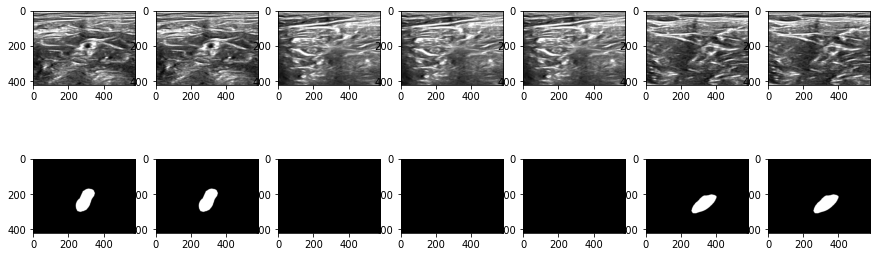

In [ ]:
draw_samples(data=train_samples, n_col=7, n_row=2)

**MODEL**

Pravljenje segmentacijskog modela, podešavanjem parametara i olakšano je upotrebom SMP-a. Postoji lista podržanih kodera u SMP-u, bira se odgovarajuća porodica enkodera i u okviru nje se bira konkretan enkoder koji dolazi sa unapred natreniranim težinama.

In [ ]:
ENCODER = 'vgg11_bn'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'sigmoid'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    in_channels=1,
    classes=1,
    activation=ACTIVATION
)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth


In [ ]:
loss = smp.utils.losses.DiceLoss()
metrics = [smp.utils.metrics.IoU()]
optimizer = torch.optim.Adam
scheduler = lr_scheduler.StepLR

In [ ]:
my_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [ ]:
def split_df(df, fraction=0.8):  
    df_1 = df.sample(frac=fraction)
    return df_1, df.drop(df_1.index)

**TRENIRANJE**

Nakon toga se nad trening skupom podatak obučava algoritam kako bi što uspešnije vršio segmentaciju nerava. 

Podešavaju se parametri kako bi se optimizovao trening i procenio učinak odnosno gubitci tokom treniranja modela. Poziva se ugrađena metoda za zaustavljanje treniranja u slučaju opadanja stope učenja, posle datog patience.

Posle uspešnog treniranja čuva se model.


In [ ]:
def train(model, train_df, train_dir, optimizer, loss, metrics, 
          learning_rate=0.01, batch_size=20, epochs=10, patience=3,
          scheduler=None, step_size=5, gamma=0.1, device='cpu', transform=None):   
    
    early_stopping = EarlyStopping(patience, path='best_model.pkl', verbose=True)
    optimizer = optimizer(model.parameters(), learning_rate)

    if scheduler:
        scheduler = scheduler(optimizer, step_size, gamma) 

    train_epoch = smp.utils.train.TrainEpoch(
        model, loss, metrics, optimizer, device, verbose=True
    )
    
    valid_epoch = smp.utils.train.ValidEpoch(
        model, loss, metrics, device, verbose=True
    ) 
    
    train_logs, valid_logs = [], []
    
    for epoch in range(epochs):   
        train_dataframe, val_dataframe = split_df(train_df) 
          
        train_dataset = ImageDataset(train_dataframe, train_dir, transform=transform)

        valid_dataset = ImageDataset(val_dataframe, train_dir, transform=transform)

        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                                   batch_size=batch_size, 
                                                   shuffle=True)    

        valid_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                                   batch_size=batch_size, 
                                                   shuffle=False)        

        print(f'\nEpoch: {epoch+1}/{epochs}')

        train_log = train_epoch.run(train_loader)
        valid_log = valid_epoch.run(valid_loader)
        
        train_logs.append(train_log)
        valid_logs.append(valid_log)
   
        early_stopping(valid_log[loss.__name__], model)
        
        if early_stopping.early_stop:
            print("Early stopping")
            break

        if scheduler:
            scheduler.step()

    return train_logs, valid_logs

In [ ]:
res = train(model=model,
            train_df=train_df, 
            train_dir=train_path, 
            optimizer=optimizer,
            loss=loss,
            learning_rate=0.01,
            metrics=metrics,
            batch_size=20,
            epochs=20,
            scheduler=scheduler,
            step_size=10,
            patience=3,
            device=DEVICE, 
            transform=my_transforms)


Epoch: 1/5
valid: 100%|██████████| 226/226 [32:13<00:00,  8.55s/it, dice_loss - 0.5032, iou_score - 0.3364]
Validation loss decreased (inf --> 0.503177).  Saving model ...

Epoch: 2/5
valid: 100%|██████████| 226/226 [32:23<00:00,  8.60s/it, dice_loss - 0.4481, iou_score - 0.3863]
Validation loss decreased (0.503177 --> 0.448115).  Saving model ...

Epoch: 3/5
valid: 100%|██████████| 226/226 [32:27<00:00,  8.62s/it, dice_loss - 0.3621, iou_score - 0.474]
Validation loss decreased (0.448115 --> 0.362080).  Saving model ...

Epoch: 4/5
valid: 100%|██████████| 226/226 [32:16<00:00,  8.57s/it, dice_loss - 0.3493, iou_score - 0.4906]
Validation loss decreased (0.362080 --> 0.349321).  Saving model ...

Epoch: 5/5
valid: 100%|██████████| 226/226 [32:17<00:00,  8.57s/it, dice_loss - 0.3134, iou_score - 0.5282]
Validation loss decreased (0.349321 --> 0.313436).  Saving model ...


**EVALUACIJA**

Nakon treniranja modela, grafički se prikazuju rezultati.

Prvo je prikazano koliko je bilo preklapanja između predicted i ground truth, izražen u opsegu od 0 do 1, a zatim koliko je bilo odstupanja tokom epoha treniranja.



In [ ]:
import pickle

In [ ]:
with open('results.pkl', 'wb') as f:
    pickle.dump(res, f)

In [ ]:
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [ ]:
train_logs_df = pd.DataFrame(res[0])
valid_logs_df = pd.DataFrame(res[1])

res_dict = {'train': train_logs_df, 'valid': valid_logs_df}

In [ ]:
def draw_graphic(df_dict, title, criteria, xlab, ylab, colors=['b', 'r'], 
                 legend_loc='best', figsize=(10, 5), fontsize=16):
    fig = plt.figure(figsize=figsize)
    for i, key in enumerate(df_dict):
        plt.plot(df_dict[key].index.tolist(), df_dict[key][criteria].tolist(), colors[i], lw=3, label=key)
    plt.xlabel(xlab, fontsize=fontsize)
    plt.ylabel(ylab, fontsize=fontsize)
    plt.title(title, fontsize=fontsize)
    plt.legend(loc=legend_loc, fontsize=fontsize)
    plt.grid()
    fig.show()  

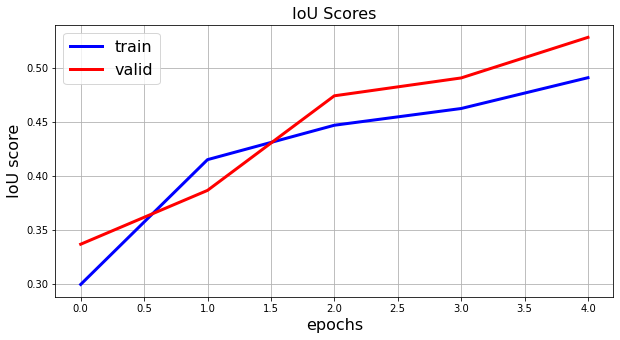

In [ ]:
draw_graphic(df_dict=res_dict, title='IoU Scores', criteria='iou_score', xlab='epochs', ylab='IoU score')

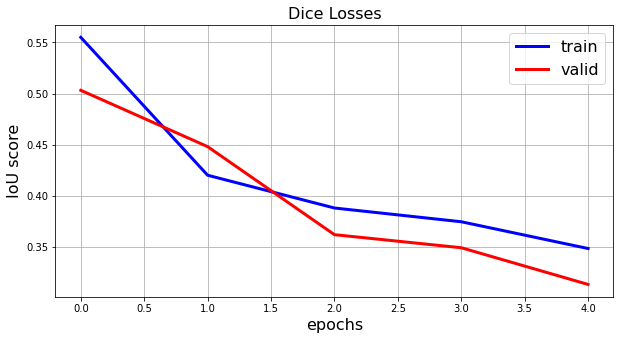

In [ ]:
draw_graphic(df_dict=res_dict, title='Dice Losses', criteria='dice_loss', xlab='epochs', ylab='IoU score')

**TESTIRANJE**

Na kraju se testira model nad test podacima i sve se čuva u submission fajlu.

Pravi se submission fajl koji sadrži pretpostavke natreniranog modela. Za svaku sliku iz trening seta se prolazi i piše kolika je predikcija odnosno gde je predviđeno da se nalazi nerv.

In [ ]:
def rle_encoding(x):
    dots = np.where(x.T.flatten()==1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
imgs = [f for f in os.listdir(test_path)]
imgs = sorted(imgs, key=lambda s: int(s.split('.')[0]))

In [ ]:
def create_csv_submission(model, data_path, img_list, out_path):
    submission_df = pd.DataFrame(columns=['img', 'pixels'])
    model.to(DEVICE)
    model.eval()
    
    for i, img in enumerate(tqdm(img_list)):
        x = Image.open(os.path.join(data_path, img))

        x = my_transforms(x)

        x = x.unsqueeze(0).to(DEVICE)
        pred_mask = model.predict(x)

        pred_mask = pred_mask.cpu()#.numpy().round().astype(np.uint8)
        pred_mask = transforms.Resize(size=(420, 580))(pred_mask)

        encoding = rle_encoding(pred_mask)

        pixels = ' '.join(map(str, encoding))
        submission_df.loc[i] = [str(i+1), pixels]

    submission_df.to_csv(out_path, index=False)

In [ ]:
create_csv_submission(model=model, 
                      data_path=test_path, 
                      img_list=imgs,
                      out_path='submission.csv')

NameError: ignored